In [43]:
import sympy as symp 

In [44]:
import numpy as np

In [45]:
import matplotlib.pyplot as plt

First I used sympy to assign x as a variable and created a function that i named expr. I then used sympy again to integrate my function expr from 1 to 7. ans.evalf() produces a finite number rather than an expression. 

In [47]:
x = symp.symbols('x')
expr = (x**3)*symp.sin(4*x)
ans = symp.integrate(expr, (x, 1, 7))
ans = ans.evalf()
ans

84.4163716059116

I created a function mcintegrate that takes 4 inputs:f,n,a,b that returns the numerical integration of the summation given in the assignment. I added the np.random.seed so that we can have real random numbers but they are consistent for each iteration. 

In [70]:
def mcintegrate(f,n,a=1,b=7):
    np.random.seed(1)
    summ=0
    diff = b - a
    for r in np.random.rand(n):
        summ+=f(r*diff+a)
    return (diff/n)*summ

In [75]:
f=symp.lambdify(x,expr)
n=100000
err_seq=[]
for i in range(1000,n+1,1000):
    err=np.abs(ans-mcintegrate(f,i))
    err_seq.append(err)

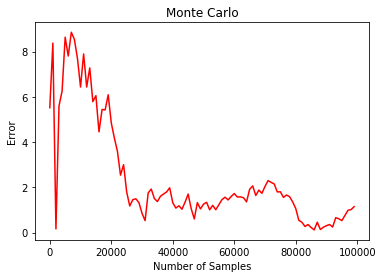

In [83]:
xpts=[x for x in range(1,n+1,1000)]
plt.plot(xpts, err_seq, 'r-')
plt.ylabel('Error')
plt.xlabel('Number of Samples')
plt.title('Monte Carlo')
plt.show()